### DATA CLEANING>
- THis notebook showcases how data cleaning can be made using python from scraped tweet data,

In [1]:
import pandas as pd
import numpy as np
import os, sys, re

import seaborn as sns
import matplotlib.pyplot as plt


#For Preprocessing
import nltk 
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

# polarity
from textblob import TextBlob

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

# wordnet and pos lib
from nltk.tokenize import word_tokenize
from nltk import pos_tag
# nltk.download('wordnet')
from nltk.corpus import wordnet


import warnings
warnings.filterwarnings("ignore")

In [2]:
# This module will be used for extaction of tweet contents.
# install neattext for automatic tweets processing
# !pip install neattext
# load neattext functions for processing
import neattext.functions as nfx

In [3]:
# We will be removing all stopwords using nltk stopwords dict. Here is a list of stopwords we will remove
# get all stopwords
nltk.download('stopwords')
stopwords = list(set(nltk.corpus.stopwords.words('english')))

# lematizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## WorkFlow.
- In this notebook, It will involve preprocessing tweet data to get clean content.
- The major goal of this is to clean in order to remove unneccessary items and also get some clean text from it for the next process.
- Few analysis will be done on the cleaned text.


### 1. Data Importation

In [4]:
# read the data using pandas from the csv file
df = pd.read_csv("../data/tweets.csv")

In [5]:
# check few samples of the data
df.sample(6)

,Datetime,Tweet Id,Text,Username
68,2023-03-30 20:48:39+00:00,1641542981240102912,#Kenya #MaandamanoThursdays,HarryGodfirst
326,2023-03-30 18:37:32+00:00,1641509981785579537,It's always the ones with the dirty hands poin...,TheChoge
424,2023-03-30 17:49:10+00:00,1641497809957580801,How many wants #Maandamano from Monday to Mond...,ShaltonOnlineTv
43,2023-03-30 21:21:51+00:00,1641551334334668808,"Don't balame anyone, it's an accident, we stan...",Oscarmukabwa
495,2023-03-30 16:58:07+00:00,1641484966168084480,@CaptainKipkorir During protests NEVER open a ...,kevoprezzo
298,2023-03-30 18:45:35+00:00,1641512007965761552,Are these two the same person?\n#MaandamanoThu...,VictorMochere


In [6]:
# check the size of the dataset.
df.shape

(1001, 4)

### 2. CLeaning Process.
- The process will involve removing all unwanted characters.
- We will extract hashtags and which can also used for analysis like which was the common aside from #MAANDAMANO
- Neattext module is going to be used for the cleaning proces.
- I will do the process cell by cell to get how things are going on.


   - What to clean
        ````
        remove mentions/userhandles
        remove hashtags
        urls
        emojis
        special char
        ````

In [7]:
# create a copy of the whole data first
data = df.copy()

In [8]:
# get only username and text columns since that what we are interested with
df = df[['Text', "Username"]]

In [9]:
# rename these columns for easier working with it
df.columns = ['text', "username"]

In [10]:
# check sample of the data
df.sample(5)

,text,username
889,""" Ruto and Gachagua Your Days Are Numbered an...",Jeshi_LaBABA
970,@nkshagaaf Thuggery sponsored by @RailaOdinga ...,3t1kd
894,"When police behave, protesters follow suit. To...",otienomjomba
642,Raila Odinga wants to access Nairobi CBD- so t...,ShadowNewsKe
484,@RailaOdinga How many of these poor souls is e...,MwanthiJunior


In [11]:
# get hashtags
df['extract_hashtags'] = df['text'].apply(nfx.extract_hashtags)

# preview similarity with hastag col
df[['extract_hashtags']]

,extract_hashtags
0,"[#kenyandictionary, #dailyquotes, #quotes, #ke..."
1,[#MaandamanoThursdays?]
2,[#MaandamanoThursdays?]
3,"[#MaandamanoThursdays, #Azimio, #UDA, #udaken,..."
4,"[#maandamano, #MaandamanoThursdays, #Maandaman..."
...,...
996,[#MaandamanoThursdays]
997,[#MaandamanoThursdays]
998,"[#azimio, #Raila]"
999,[#MaandamanoThursdays]


In [12]:
# remove hashtags from the column and save the cleaned text to clean text column
df['clean_text'] = df['text'].apply(nfx.remove_hashtags)

# preview
df[['text','clean_text']].head(10)

,text,clean_text
0,Whatever you hold in your mind on a consistent...,Whatever you hold in your mind on a consistent...
1,Uko Kisumu na unafungua duka in the middle of ...,Uko Kisumu na unafungua duka in the middle of ...
2,@abdi_fuadi @RailaOdinga Uko Kisumu na unafung...,@abdi_fuadi @RailaOdinga Uko Kisumu na unafung...
3,Am a UDA fan and the solution for this demos a...,Am a UDA fan and the solution for this demos a...
4,Kimani ichungwa tafadhali wacha bangi ati kush...,Kimani ichungwa tafadhali wacha bangi ati kush...
5,#MaandamanoThursdays,
6,Corporal is a mental case with a gun. He is s...,Corporal is a mental case with a gun. He is s...
7,"Niggas, this the streets, you know you can b...","Niggas, this the streets, you know you can b..."
8,#RailaOdinga #Maandamano https://t.co/mxESxPTAgI,https://t.co/mxESxPTAgI
9,The supreme art of war is to subdue the enemy ...,The supreme art of war is to subdue the enemy ...


In [13]:
# remove RT and user handles
def removeRT(text):
    return text.replace("RT" , "")
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_userhandles(x))
df['clean_text'] = df['clean_text'].apply(removeRT)


df[['text','clean_text']].head(10)

,text,clean_text
0,Whatever you hold in your mind on a consistent...,Whatever you hold in your mind on a consistent...
1,Uko Kisumu na unafungua duka in the middle of ...,Uko Kisumu na unafungua duka in the middle of ...
2,@abdi_fuadi @RailaOdinga Uko Kisumu na unafung...,Uko Kisumu na unafungua duka in the middle...
3,Am a UDA fan and the solution for this demos a...,Am a UDA fan and the solution for this demos a...
4,Kimani ichungwa tafadhali wacha bangi ati kush...,Kimani ichungwa tafadhali wacha bangi ati kush...
5,#MaandamanoThursdays,
6,Corporal is a mental case with a gun. He is s...,Corporal is a mental case with a gun. He is s...
7,"Niggas, this the streets, you know you can b...","Niggas, this the streets, you know you can b..."
8,#RailaOdinga #Maandamano https://t.co/mxESxPTAgI,https://t.co/mxESxPTAgI
9,The supreme art of war is to subdue the enemy ...,The supreme art of war is to subdue the enemy ...


In [14]:
# remove multiple white spaces
def stripSpace(text):
    return text.strip()
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
df['clean_text'] = df['clean_text'].apply(stripSpace)




In [15]:
# remove all urls
df['clean_text'] = df['clean_text'].apply(nfx.remove_urls)

df[['text','clean_text']].head(10)

,text,clean_text
0,Whatever you hold in your mind on a consistent...,Whatever you hold in your mind on a consistent...
1,Uko Kisumu na unafungua duka in the middle of ...,Uko Kisumu na unafungua duka in the middle of ...
2,@abdi_fuadi @RailaOdinga Uko Kisumu na unafung...,Uko Kisumu na unafungua duka in the middle of ...
3,Am a UDA fan and the solution for this demos a...,Am a UDA fan and the solution for this demos a...
4,Kimani ichungwa tafadhali wacha bangi ati kush...,Kimani ichungwa tafadhali wacha bangi ati kush...
5,#MaandamanoThursdays,
6,Corporal is a mental case with a gun. He is s...,Corporal is a mental case with a gun. He is sh...
7,"Niggas, this the streets, you know you can b...","Niggas, this the streets, you know you can ble..."
8,#RailaOdinga #Maandamano https://t.co/mxESxPTAgI,
9,The supreme art of war is to subdue the enemy ...,The supreme art of war is to subdue the enemy ...


In [16]:
# remove pucntuations
df['clean_text'] = df['clean_text'].apply(nfx.remove_puncts)

df[['text','clean_text']].head(10)

,text,clean_text
0,Whatever you hold in your mind on a consistent...,Whatever you hold in your mind on a consistent...
1,Uko Kisumu na unafungua duka in the middle of ...,Uko Kisumu na unafungua duka in the middle of ...
2,@abdi_fuadi @RailaOdinga Uko Kisumu na unafung...,Uko Kisumu na unafungua duka in the middle of ...
3,Am a UDA fan and the solution for this demos a...,Am a UDA fan and the solution for this demos a...
4,Kimani ichungwa tafadhali wacha bangi ati kush...,Kimani ichungwa tafadhali wacha bangi ati kush...
5,#MaandamanoThursdays,
6,Corporal is a mental case with a gun. He is s...,Corporal is a mental case with a gun He is sho...
7,"Niggas, this the streets, you know you can b...",Niggas this the streets you know you can bleed...
8,#RailaOdinga #Maandamano https://t.co/mxESxPTAgI,
9,The supreme art of war is to subdue the enemy ...,The supreme art of war is to subdue the enemy ...


In [17]:
# lets check on null text, some might be cleaned everything
df.isna().sum()

text                0
username            0
extract_hashtags    0
clean_text          0
dtype: int64

In [18]:
# lets get hashtags into a good string and remove the hashes beside the tag
def clean_hash_tag(text):
    return " ".join([nfx.remove_puncts(x).replace("#", "") for x in text])

df['extract_hashtags'] = df['extract_hashtags'].apply(clean_hash_tag)

In [19]:
# dealing with emojis
df['clean_text'].apply(nfx.extract_emojis)

0        []
1        []
2        []
3        []
4        []
       ... 
996      []
997      []
998      []
999      []
1000    [😭]
Name: clean_text, Length: 1001, dtype: object

In [20]:
# remove them
df['clean_text'] = df['clean_text'].apply(nfx.remove_emojis)

In [21]:
# check the final cleaned data
df.head()

,text,username,extract_hashtags,clean_text
0,Whatever you hold in your mind on a consistent...,Ke_Dictionary,kenyandictionary dailyquotes quotes kenyanquot...,Whatever you hold in your mind on a consistent...
1,Uko Kisumu na unafungua duka in the middle of ...,OnguruMeister,MaandamanoThursdays,Uko Kisumu na unafungua duka in the middle of ...
2,@abdi_fuadi @RailaOdinga Uko Kisumu na unafung...,OnguruMeister,MaandamanoThursdays,Uko Kisumu na unafungua duka in the middle of ...
3,Am a UDA fan and the solution for this demos a...,waryawarya19,MaandamanoThursdays Azimio UDA udaken Maandama...,Am a UDA fan and the solution for this demos a...
4,Kimani ichungwa tafadhali wacha bangi ati kush...,waryawarya19,maandamano MaandamanoThursdays MaandamanoMondays,Kimani ichungwa tafadhali wacha bangi ati kush...


- The above receives summarizes the text cleaning process.



### 3. POS tagging
- Cleaned text column is going to be used for this part of POS tagging and lemmatization
- Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag).
- POS tagging essential to preserve the context of the word and is essential for Lemmatization

In [22]:
# create POS tagger for verb , adjective , noun , adverb etc

# nltk.download('wordnet')
# nltk.download('omw-1.4')
pos_tagger = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    """
    @params -- text --- a text to be tagged using pos
    Tags a word to its corrected POS 
    
    returns  a list of tuple containing the word and its POS
    """
    word_tags = pos_tag(word_tokenize(text))
    return_list = []
    for word, tag in word_tags:
        if word.lower() not in stopwords:
            return_list.append(tuple([word, pos_tagger.get(tag[0])]))
    return return_list

In [23]:
# nltk.download('averaged_perceptron_tagger')

#### Some explanation for the pos tags found
- a adjective
- N noun
- V verb
- R adverb

In [24]:
# apply the pos tagger function
df['pos_tagged'] = df['clean_text'].apply(token_stop_pos)

# check the data 
df[['clean_text' , 'pos_tagged']].tail(10)

,clean_text,pos_tagged
991,Wow Love it 🥳\nCongratulations to whoever play...,"[(Wow, n), (Love, n), (🥳, v), (Congratulations..."
992,Maandamano Demonstrators in Oyugis have disapp...,"[(Maandamano, n), (Demonstrators, n), (Oyugis,..."
993,Hello Is this your gang,"[(Hello, n), (gang, n)]"
994,The power of democracy is in the hands of the ...,"[(power, n), (democracy, n), (hands, n), (peop..."
995,Kenya lacks a professional police force cogniz...,"[(Kenya, n), (lacks, v), (professional, a), (p..."
996,The entire Azimio family is grateful to Reside...,"[(entire, a), (Azimio, n), (family, n), (grate..."
997,Guys were peaceful today demonstrating picketi...,"[(Guys, n), (peaceful, a), (today, n), (demons..."
998,Scary to Watch: Video of Pwani University Bus ...,"[(Scary, a), (Watch, v), (:, None), (Video, n)..."
999,Jacaranda vijana walikua na kiu sana Sasa wana...,"[(Jacaranda, n), (vijana, n), (walikua, n), (n..."
1000,RIP to Pwani university Comrades\n14 people de...,"[(RIP, n), (Pwani, n), (university, n), (Comra..."


### 4/. LEMATIZATION PART
- lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. It involves getting the root of the word

In [25]:
def get_lemmatization_from_pos(pos_tuple_list):
    """
    @params -- pos_tuple-- a list with tuple of  a word with its tags to be lemmatized
    Lematizes a word to required lemma/root
    
    returns a lematized word/sentence
    """
    sent_lemma = " "
    for word, pos_tag in pos_tuple_list:
        if not pos_tag:
            lemma = word
            sent_lemma = sent_lemma + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos_tag)
            sent_lemma = sent_lemma + " " + lemma
    return sent_lemma

In [26]:
# apply the function
df['lemmatized_text'] = df['pos_tagged'].apply(get_lemmatization_from_pos)

In [27]:
# check the data
df[['clean_text' , 'pos_tagged' , 'lemmatized_text']].head()

,clean_text,pos_tagged,lemmatized_text
0,Whatever you hold in your mind on a consistent...,"[(Whatever, None), (hold, v), (mind, n), (cons...",Whatever hold mind consistent basis exactly ...
1,Uko Kisumu na unafungua duka in the middle of ...,"[(Uko, n), (Kisumu, n), (na, None), (unafungua...",Uko Kisumu na unafungua duka middle Ichieni ...
2,Uko Kisumu na unafungua duka in the middle of ...,"[(Uko, n), (Kisumu, n), (na, None), (unafungua...",Uko Kisumu na unafungua duka middle Ichieni ...
3,Am a UDA fan and the solution for this demos a...,"[(UDA, n), (fan, n), (solution, n), (demos, n)...",UDA fan solution demo madness Ruto must Humb...
4,Kimani ichungwa tafadhali wacha bangi ati kush...,"[(Kimani, n), (ichungwa, n), (tafadhali, n), (...",Kimani ichungwa tafadhali wacha bangi ati ku...


In [28]:
df.columns

Index(['text', 'username', 'extract_hashtags', 'clean_text', 'pos_tagged',
       'lemmatized_text'],
      dtype='object')

In [29]:
# save the final cleaned text
df[['username', "lemmatized_text", "extract_hashtags"]].to_csv("../data/cleaned_tweets.csv", index=False)

### 5. Few Analysis On the data.
- Here we will be checking the most commonly used words, word length distribution etc.
- We are going to use lemmatized text as the final text

In [30]:
def get_most_tokens(docs,num=40):
    """
    Get the most appearing tokens in a doc
    """
    from collections import Counter
    tokens = Counter(docs)
    most_tokens = tokens.most_common(num)
    result = dict(most_tokens)
    return result
def plot_graph_common_words(title, data ,total_words =40):
    """
    @params
        - data - text
        - total number of words to be shown
    Plots a graph of the most common words in selected Emotion
    """
    plt.figure(figsize=(16,8))
    plt.title(f"Most common words sued words in the {title}", fontsize=17,c='g', fontweight='bold')
    sns.barplot(
        x='words',
        y='scores',
        data=pd.DataFrame(get_most_tokens(data , total_words).items(),columns=['words','scores']))
    plt.xticks(rotation=60)
    plt.show()

In [31]:
# get the tokens from the lematized text
lemma_tokens = [token for line in df['lemmatized_text']  for token in line.split() if token not in stopwords]

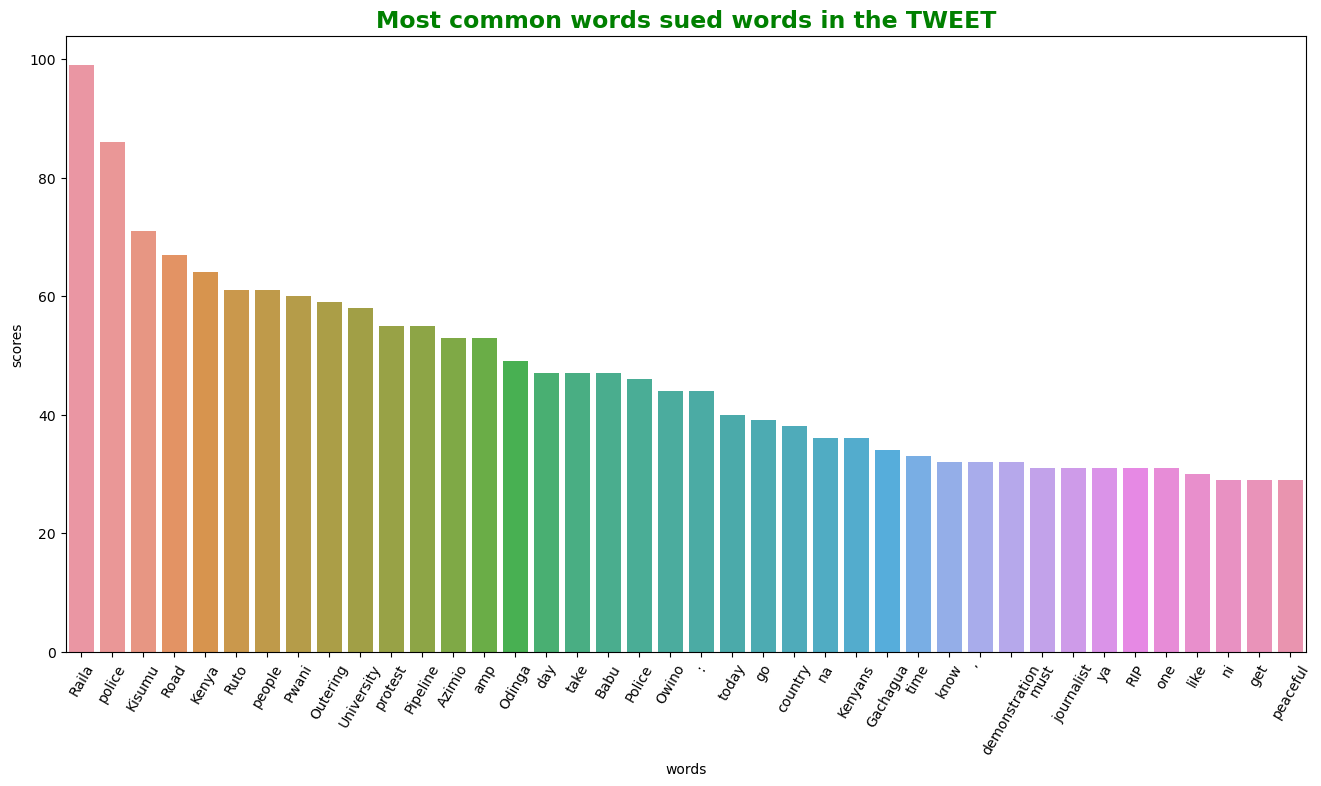

In [32]:
# plot a graph of word common used words
plot_graph_common_words("TWEET", lemma_tokens)

In [33]:
# get the hash tag lemmas
hash_tag_tokens = [token for line in df['extract_hashtags']  for token in line.split()]

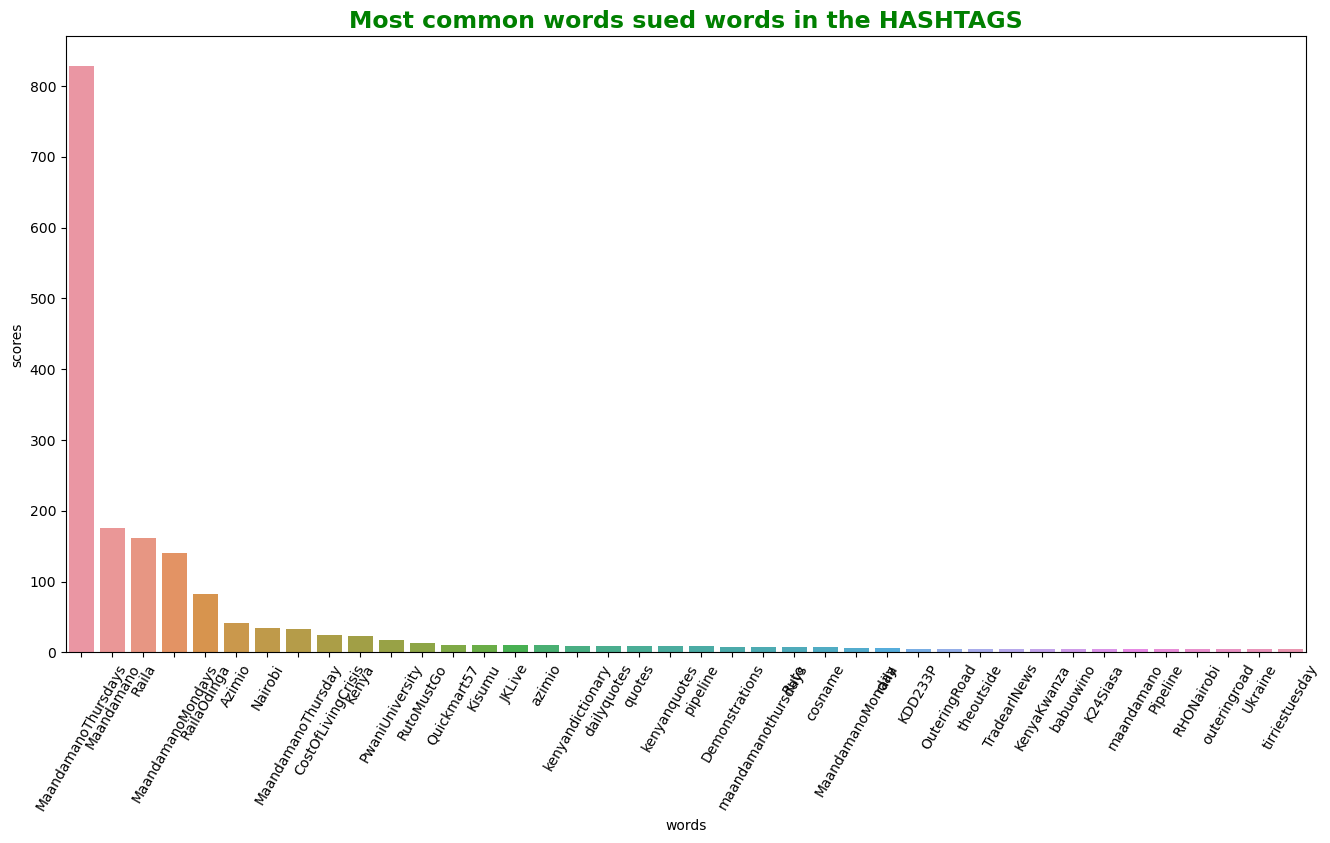

In [34]:
# ploit for the hash tags
plot_graph_common_words("HASHTAGS", hash_tag_tokens)

Text(0.5, 1.0, 'Number of Words Per Record Available')

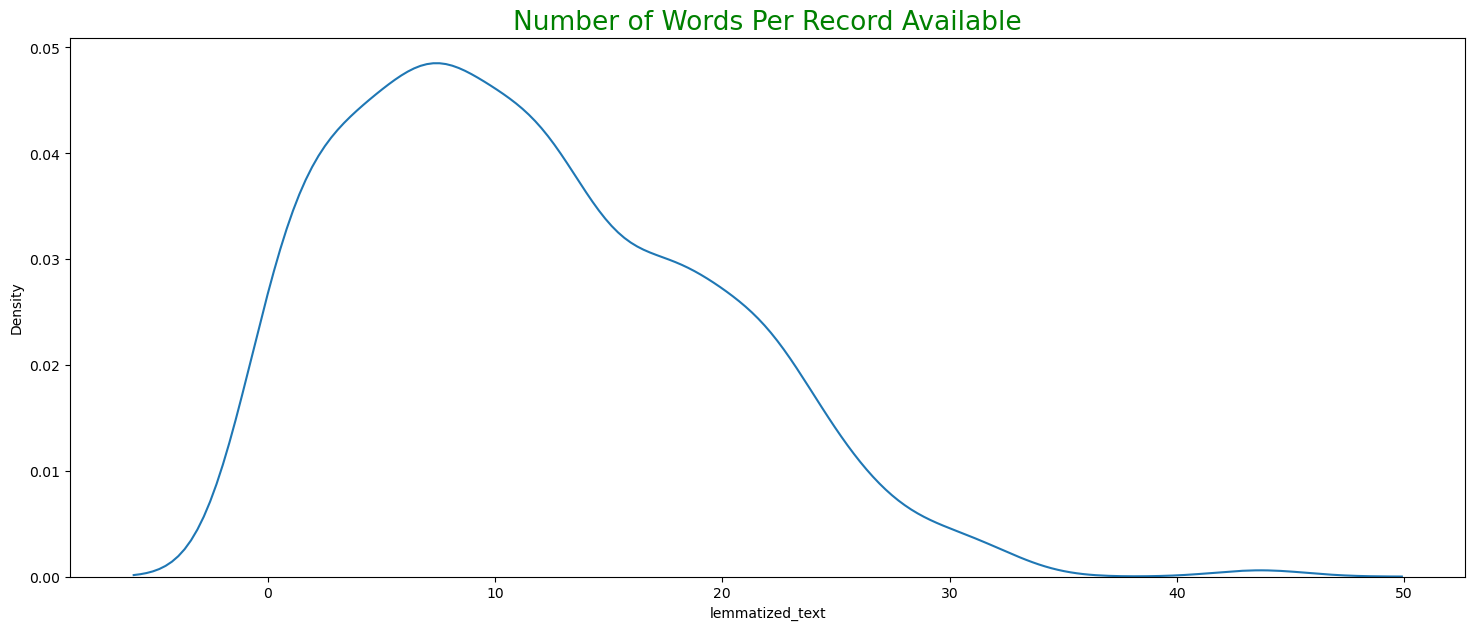

In [35]:
# get the length per tweet
plt.figure(figsize=(18,7))
sns.kdeplot(x = df['lemmatized_text'].apply(lambda x: len(x.split())), palette="Set1")
plt.title("Number of Words Per Record Available", fontsize=19, c='g')

Text(0.5, 1.0, 'Average length of characters per record')

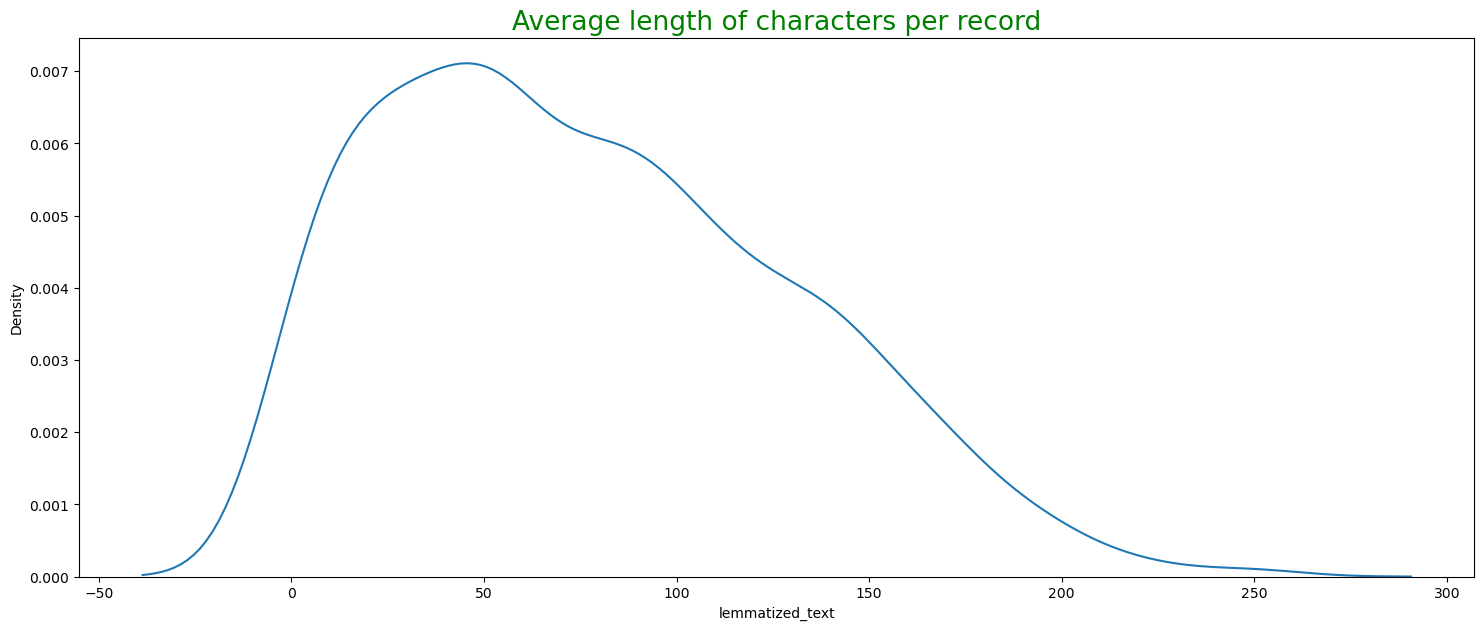

In [36]:
# average number of characters per record distributiion
plt.figure(figsize=(18,7))
sns.kdeplot(x = df['lemmatized_text'].apply(len), palette="Set1")
plt.title("Average length of characters per record", fontsize=19, c='g')